In [41]:
import mat73
import pandas as pd
import numpy as np
import scipy.io
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

### Data loading and preprocessing

In [42]:
import os

DATA_DIR = ''
if 'google.colab' not in str(get_ipython()) and "anuja" in os.environ.get('USER'):
    DATA_DIR = 'data/'
    

In [43]:
foof = pd.read_csv(DATA_DIR+"/home/ubuntu/Martyna/repo/AI4Health/DATAfoof/source_intercept_slope.csv")
#foof = foof.drop('Unnamed: 0', 1)
foof

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,IDs
0,0.160123,1.362617,-0.002037,1.427172,0.810964,1.391837,0.745124,1.378194,0.527491,1.433532,...,1.519565,1.004265,1.450747,0.956578,1.456952,0.611944,1.503932,0.282555,1.441946,NDARAA075AMK
1,0.988915,1.330636,1.151667,1.546990,1.479442,1.608810,1.342563,1.559859,0.460923,1.434832,...,1.461904,1.449481,1.480738,0.889122,1.282076,0.950479,1.138697,1.372408,1.505823,NDARAA112DMH
2,1.455004,1.515717,0.988018,1.367703,2.029333,1.763131,2.086803,1.763987,1.320758,1.585413,...,1.502295,1.596192,1.448922,1.180667,1.199036,1.658822,1.619147,1.182087,1.395998,NDARAA117NEJ
3,0.796931,1.547997,0.016022,0.956344,0.638462,1.222323,0.698921,1.395078,-0.130122,1.156477,...,0.998001,0.079507,1.285272,0.471817,1.175649,0.617125,1.418717,0.401675,1.222953,NDARAA947ZG5
4,-0.627481,1.123518,-0.255195,1.273727,0.197328,1.344738,0.282533,1.387126,-0.808075,1.077384,...,1.363285,0.049249,1.207528,-0.118998,1.296786,-0.253839,1.176320,-0.033039,1.318181,NDARAA948VFH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,-0.124896,1.111637,0.025096,1.109243,0.393830,0.864464,0.422308,0.871363,-0.311337,0.979262,...,1.104898,0.215057,0.976700,0.769451,1.101020,-0.013650,1.085802,0.159527,1.034021,NDARRY126FA5
1408,0.259345,1.268732,0.532802,1.492400,0.722490,1.482126,0.730926,1.432505,-0.205835,1.230099,...,1.508386,0.529724,1.352627,1.061175,1.606489,0.540497,1.275614,0.835786,1.468853,NDARRY215CXQ
1409,0.396271,1.361393,0.176390,1.363488,0.753262,1.453320,0.707356,1.481902,-0.070967,1.338482,...,1.348029,0.901967,1.433662,0.392497,1.112497,0.585191,1.396128,0.307516,1.337915,NDARRY268AF2
1410,0.300712,1.325074,0.534767,1.416291,0.846201,1.590482,0.853024,1.632593,0.317269,1.416499,...,1.399847,0.863988,1.219525,1.119859,1.336477,0.667894,1.395374,0.618072,1.330237,NDARRY280KNW


In [44]:
data = mat73.loadmat(DATA_DIR+'x_source_new.mat')  
df2 = pd.DataFrame(data['x'].reshape((data['x'].shape[0], -1)))

# sparsing
df2 = np.array(df2).reshape(data['x'].shape) 
df2_sparsed = np.concatenate([np.expand_dims(df2[:,:,i:i+2].mean(axis = 2), axis = 2) for i in range(0, data['x'].shape[2]-2, 2)], axis = 2)
df2 = pd.DataFrame(df2_sparsed.reshape((df2_sparsed.shape[0], -1)))

#scaling
norm = MinMaxScaler().fit(df2)
df2 = norm.transform(df2)
df2 = pd.DataFrame(df2.reshape((df2.shape[0], -1)))

df2['IDs'] = foof['IDs']
df2

,0,1,2,3,4,5,6,7,8,9,...,2643,2644,2645,2646,2647,2648,2649,2650,2651,IDs
0,5.101913e-11,1.992207e-08,2.402816e-06,1.218602e-04,3.864207e-03,0.040095,0.179954,4.270175e-01,4.634880e-01,3.890722e-01,...,3.843416e-03,2.106884e-04,5.118096e-06,4.670563e-08,1.832631e-10,3.079021e-13,1.701302e-16,0.000000e+00,0.000000e+00,NDARAA075AMK
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,6.776939e-17,5.105700e-16,5.725257e-15,...,2.088142e-01,2.313505e-01,4.140847e-01,2.058921e-01,3.437418e-01,1.930270e-01,2.860178e-01,4.766788e-02,7.230240e-04,NDARAA112DMH
2,2.661419e-02,1.264720e-01,8.284766e-06,2.918035e-12,3.280463e-09,0.000007,0.038736,1.984120e-01,2.976885e-01,4.438104e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NDARAA117NEJ
3,2.380404e-02,4.203522e-01,3.468028e-01,3.200351e-01,4.774229e-01,0.074612,0.079222,1.015326e-01,9.357454e-02,1.306764e-01,...,1.911892e-01,6.062096e-02,4.113846e-01,7.161245e-01,3.323713e-01,5.250955e-02,1.845979e-01,4.270583e-01,1.610893e-01,NDARAA947ZG5
4,2.394631e-01,4.350986e-01,3.745264e-01,2.070651e-01,1.087368e-01,0.030269,0.095985,2.162397e-01,1.855508e-01,1.166599e-01,...,6.742616e-02,7.341512e-02,8.137233e-02,7.837132e-02,7.548040e-02,7.270647e-02,1.187193e-01,7.464320e-02,6.494024e-02,NDARAA948VFH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,3.739917e-03,1.621763e-01,1.145210e-01,1.717832e-03,2.876346e-03,0.036229,0.203065,2.488511e-01,1.714610e-01,8.331924e-02,...,1.686810e-03,1.423780e-04,1.267766e-05,1.576811e-06,2.304640e-07,3.126707e-08,3.797884e-09,4.119393e-10,3.989325e-11,NaN
2038,2.134005e-06,4.229760e-04,1.248026e-02,7.758914e-02,1.714416e-01,0.180892,0.169312,1.428294e-01,2.635778e-01,3.428152e-01,...,2.357898e-07,3.632691e-08,5.206799e-09,5.926503e-10,6.164682e-11,5.860062e-12,5.090295e-13,4.043299e-14,2.933030e-15,NaN
2039,5.561633e-16,1.265773e-12,8.057262e-10,1.905719e-07,2.488557e-05,0.000939,0.013563,9.140757e-02,1.911413e-01,2.630192e-01,...,7.135652e-02,9.507114e-02,1.348492e-01,1.594672e-01,1.807321e-01,1.963087e-01,2.043546e-01,2.038778e-01,1.949377e-01,NaN
2040,1.186254e-07,1.126116e-05,3.801973e-04,6.209405e-03,7.283916e-02,0.320383,0.696183,9.051547e-01,5.121514e-01,2.078802e-01,...,1.125051e-03,3.257921e-04,8.646941e-05,1.795490e-05,3.356598e-06,5.649386e-07,8.560071e-08,1.167659e-08,1.433856e-09,NaN


In [45]:
beh = pd.read_csv(DATA_DIR+"behaviorals.csv")
print('Before:'+str(beh.shape))

most_common_disorders = ['Attention-Deficit/Hyperactivity Disorder', 'Anxiety Disorders', 'Specific Learning Disorder',
                         'Autism Spectrum Disorder', 'Disruptive', 'Communication Disorder',
                         'Depressive Disorders',  'No Diagnosis Given', 'Other Disorders']

category_columns = ['DX_' + str(i).zfill(2) + '_Cat' for i in range(1, 11)] +\
                   ['DX_' + str(i).zfill(2) + '_Sub' for i in range(1, 11)]

# removing patients with incomplete eval
initial_size = beh.shape[0]
beh = beh[beh.DX_01 != 'No Diagnosis Given: Incomplete Eval']
beh = beh.reset_index(drop=True)
new_size = beh.shape[0]

print('After:'+str(beh.shape))
print('Removing', initial_size - new_size,
      'patients as their evaluations was incomplete.')

Before:(3076, 177)
After:(2939, 177)
Removing 137 patients as their evaluations was incomplete.


In [46]:
beh.columns

Index(['Unnamed: 0', 'IDs', 'Age', 'Sex', 'ACE_Score', 'APQ_P_Total',
       'APQ_SR_Total', 'ARI_P_Total_Score', 'ARI_S_Total_Score', 'ASSQ_Total',
       ...
       'DX_10_PRem', 'DX_10_Past_Doc', 'DX_10_Presum', 'DX_10_RC', 'DX_10_Rem',
       'DX_10_RuleOut', 'DX_10_Spec', 'DX_10_Sub', 'DX_10_Time', 'NoDX'],
      dtype='object', length=177)

In [47]:
no_diagnosis_given = 'No Diagnosis Given'
diagnoses_to_ids = {disorder: i for i, disorder in enumerate(most_common_disorders)}
diagnoses_to_ids

{'Attention-Deficit/Hyperactivity Disorder': 0,
 'Anxiety Disorders': 1,
 'Specific Learning Disorder': 2,
 'Autism Spectrum Disorder': 3,
 'Disruptive': 4,
 'Communication Disorder': 5,
 'Depressive Disorders': 6,
 'No Diagnosis Given': 7,
 'Other Disorders': 8}

In [48]:
def get_disorder(data, row, index):
    disorder = data.iloc[row][category_columns[index]]

    if disorder == 'Neurodevelopmental Disorders':
        disorder = data.iloc[row][category_columns[index + 10]]

    return disorder

order_of_disorders = []
for k in range(beh.shape[0]):
    i = 0
    disorder = get_disorder(beh, k, i)
    disorders_patient = []
    while not pd.isnull(disorder):
        if disorder in diagnoses_to_ids:
            if diagnoses_to_ids[disorder] not in disorders_patient:
                disorders_patient.append(diagnoses_to_ids[disorder])
        else:
            if diagnoses_to_ids['Other Disorders'] not in disorders_patient:
                disorders_patient.append(diagnoses_to_ids['Other Disorders'])
        i += 1
        if i == len(category_columns):
            break
        disorder = get_disorder(beh, k, i)

        
    order_of_disorders.append(disorders_patient)

In [49]:
other_disorders = []
no_diagnosis_given = []
for i in order_of_disorders:
    if 7 in i:
        no_diagnosis_given.append(1)
        i.remove(7)
    else:
        no_diagnosis_given.append(0)
    if 8 in i:
        other_disorders.append(1)
        i.remove(8)
    else:
        other_disorders.append(0)

In [50]:
max_len_order = np.max([len(x) for x in order_of_disorders])

# pad with a new token denoting the pad token
pad_token = len(most_common_disorders)
bod_token = len(most_common_disorders) + 1
eod_token = len(most_common_disorders) + 2

order_of_disorders = [[bod_token] + x + [eod_token] + [pad_token] * (max_len_order - len(x)) for x in order_of_disorders]

order_of_disorders = np.array(order_of_disorders)

classes = np.zeros((len(most_common_disorders),
                    beh.shape[0]), dtype=np.int32)

df_disorders = beh[category_columns]

for i, disorder in enumerate(most_common_disorders):
    mask = df_disorders.select_dtypes(include=[object]). \
        applymap(lambda x: disorder in x if pd.notnull(x) else False)

    disorder_df = df_disorders[mask.any(axis=1)]

    np.add.at(classes[i], disorder_df.index.values, 1)

behaviour_data_columns = beh.columns.values.astype(np.str)

columns_to_drop = behaviour_data_columns[
    np.flatnonzero(np.core.defchararray.find(behaviour_data_columns, 'DX') != -1)]

behaviour_data = beh.drop(columns=columns_to_drop)

for disorder, classification in zip(most_common_disorders, classes):
    behaviour_data[disorder] = classification

behaviour_data['order_diagnoses'] = list(order_of_disorders)

In [51]:
common_disorders = ['Attention-Deficit/Hyperactivity Disorder', 'Anxiety Disorders', 'Specific Learning Disorder',
                         'Autism Spectrum Disorder', 'Disruptive', 'Communication Disorder',
                         'Depressive Disorders']

labels=behaviour_data[["IDs"]+list(common_disorders)]
labels["Other Disorders"] = other_disorders
labels

/tmp/ipykernel_1236953/226828375.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels["Other Disorders"] = other_disorders


,IDs,Attention-Deficit/Hyperactivity Disorder,Anxiety Disorders,Specific Learning Disorder,Autism Spectrum Disorder,Disruptive,Communication Disorder,Depressive Disorders,Other Disorders
0,NDARAA075AMK,0,0,0,0,0,0,0,0
1,NDARAA112DMH,1,0,0,0,1,0,0,1
2,NDARAA117NEJ,1,0,0,0,1,0,0,1
3,NDARAA306NT2,1,1,1,0,0,1,0,1
4,NDARAA504CRN,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
2934,NDARZZ007YMP,0,0,0,1,0,0,0,1
2935,NDARZZ740MLM,1,0,0,0,0,0,0,0
2936,NDARZZ810LVF,0,0,0,1,0,1,0,1
2937,NDARZZ830JM7,0,0,0,1,0,0,0,1


In [52]:
add_features = behaviour_data[['Sex', 'Age','IDs']]
add_features.shape

(2939, 3)

In [53]:
df = pd.merge(df2, foof, on='IDs', how='inner')
df = pd.merge(df2, labels, on='IDs', how='inner')
df = pd.merge(df, add_features, on='IDs', how='inner')
df

,0,1,2,3,4,5,6,7,8,9,...,Attention-Deficit/Hyperactivity Disorder,Anxiety Disorders,Specific Learning Disorder,Autism Spectrum Disorder,Disruptive,Communication Disorder,Depressive Disorders,Other Disorders,Sex,Age
0,5.101913e-11,1.992207e-08,2.402816e-06,1.218602e-04,3.864207e-03,4.009528e-02,1.799539e-01,4.270175e-01,4.634880e-01,3.890722e-01,...,0,0,0,0,0,0,0,0,1,6.728040
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.776939e-17,5.105700e-16,5.725257e-15,...,1,0,0,0,1,0,0,1,0,5.545744
2,2.661419e-02,1.264720e-01,8.284766e-06,2.918035e-12,3.280463e-09,6.808455e-06,3.873552e-02,1.984120e-01,2.976885e-01,4.438104e-01,...,1,0,0,0,1,0,0,1,0,7.475929
3,2.380404e-02,4.203522e-01,3.468028e-01,3.200351e-01,4.774229e-01,7.461242e-02,7.922153e-02,1.015326e-01,9.357454e-02,1.306764e-01,...,1,0,1,1,0,0,0,1,0,13.627880
4,2.394631e-01,4.350986e-01,3.745264e-01,2.070651e-01,1.087368e-01,3.026856e-02,9.598491e-02,2.162397e-01,1.855508e-01,1.166599e-01,...,1,0,0,0,0,0,0,1,1,7.982660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,5.342343e-09,3.195851e-08,2.003322e-06,1.136175e-04,3.927355e-03,4.250591e-02,1.905152e-01,4.299257e-01,3.231411e-01,1.705013e-01,...,1,1,0,0,0,0,0,1,1,12.581679
1334,1.301025e-15,8.855690e-15,4.035589e-14,1.504955e-06,1.062141e-01,5.335448e-02,4.013857e-02,7.735320e-02,1.213426e-01,1.911046e-01,...,0,1,0,0,0,0,1,0,1,18.881359
1335,1.313673e-12,6.529546e-12,2.192466e-11,6.742710e-11,2.809208e-10,8.245398e-10,2.238683e-09,6.787882e-09,1.513961e-08,5.234011e-08,...,1,0,0,0,0,0,0,0,0,8.094227
1336,2.610322e-05,3.199561e-03,5.956507e-02,2.386200e-01,3.216022e-01,2.334303e-01,5.749975e-01,5.311708e-01,3.123856e-01,6.358041e-02,...,1,0,0,0,0,0,0,0,0,9.622518


### Data Split

In [54]:
disorders_list = ['Attention-Deficit/Hyperactivity Disorder', 'Anxiety Disorders', 'Specific Learning Disorder',
                         'Autism Spectrum Disorder', 'Disruptive', 'Communication Disorder',
                         'Depressive Disorders', 'Other Disorders']
                         
#rest_list = ['Age','Sex']            
x = df[df.columns.difference(['IDs']+disorders_list)]
        
#x = df[df.columns.difference(['IDs']+disorders_list + rest_list)]
y = df[disorders_list]

# summarize dataset shape
print(x.shape, y.shape)

(1338, 2654) (1338, 8)


In [55]:
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size=0.25, shuffle=True)

In [56]:
train_labels = np. array(train_labels) 
test_labels = np. array(test_labels) 

In [57]:
print(train_features.shape, test_features.shape)

(1003, 2654) (335, 2654)


## FEATURE EXTRACTION WITH PCA

In [58]:
#scaling features

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(train_features)

# transform training data
train_features = norm.transform(train_features)
test_features = norm.transform(test_features)

print(train_features.shape, test_features.shape)

(1003, 2654) (335, 2654)


/home/ubuntu/anaconda3/envs/ai4halth/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/ubuntu/anaconda3/envs/ai4halth/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/ubuntu/anaconda3/envs/ai4halth/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [59]:
train_features_spectra = train_features[:,:-2]
test_features_spectra = test_features[:,:-2]


In [60]:
train_features_spectra.shape
test_features_spectra.shape

(335, 2652)

In [61]:
# dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(.95) # 95% variance retained
pca.fit(train_features_spectra)

# transform data
train_features_spectra = pca.transform(train_features_spectra)
test_features_spectra = pca.transform(test_features_spectra)
print(train_features_spectra.shape, test_features_spectra.shape)

(1003, 367) (335, 367)


In [62]:
train_labels.sum(axis=0)

array([613, 337, 235, 146, 160, 152,  96, 412])

In [63]:
test_labels.sum(axis=0)

array([201, 105,  76,  55,  47,  57,  38, 128])

## Adding age and gender

In [64]:
train_features_new = np.concatenate([train_features_spectra, train_features[:,-2:]], axis = 1)
test_features_new = np.concatenate([test_features_spectra, test_features[:,-2:]], axis = 1)


In [65]:
train_features_new = train_features
test_features_new = test_features

## FEATURE EXTRACTION WITH AUTOENCODER

In [66]:
# import tensorflow as tf
# from tensorflow.keras.models import Model, load_model
# from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization
# from tensorflow.keras.utils import plot_model, to_categorical

# n_inputs = train_features.shape[1]

# visible = Input(shape=(n_inputs,))
# e = Dense(n_inputs*2)(visible)
# e = BatchNormalization()(e)
# e = LeakyReLU()(e)
# e = Dense(n_inputs)(e)
# e = BatchNormalization()(e)
# e = LeakyReLU()(e)
# n_bottleneck = round(float(n_inputs) / 2.0)
# bottleneck = Dense(n_bottleneck)(e)

# d = Dense(n_inputs)(bottleneck)
# d = BatchNormalization()(d)
# d = LeakyReLU()(d)

# d = Dense(n_inputs*2)(d)
# d = BatchNormalization()(d)
# d = LeakyReLU()(d)

# output = Dense(8, activation='linear')(d)

# model = Model(inputs=visible, outputs=output)
# model.compile(optimizer='adam', loss='mse')
# plot_model(model, 'autoencoder_compress.png', show_shapes=True)

# history = model.fit(train_features, train_labels, epochs=50, batch_size=16, verbose=2)
# encoder = Model(inputs=visible, outputs=bottleneck)

# plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# encoder.save('autoencoder.h5')

In [67]:
# # encode the data
# encoder= load_model('autoencoder.h5', compile=False)

# train_features = encoder.predict(train_features)
# test_features = encoder.predict(test_features)

### Metrics

In [68]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from itertools import cycle

n_classes = train_labels.shape[1]

def plot_pr_curve(Y_test, y_score):
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(
        Y_test.ravel(), y_score.ravel()
    )
    average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")

    _, ax = plt.subplots(figsize=(8, 8))

    f_scores = np.linspace(0.2, 0.8, num=4)
    lines, labels = [], []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
        plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

    display = PrecisionRecallDisplay(
        recall=recall["micro"],
        precision=precision["micro"],
        average_precision=average_precision["micro"],
    )
    display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

    for i in range(n_classes):
        display = PrecisionRecallDisplay(
            recall=recall[i],
            precision=precision[i],
            average_precision=average_precision[i],
        )
        display.plot(ax=ax, name=f"Precision-recall for class {i}")

    # add the legend for the iso-f1 curves
    handles, labels = display.ax_.get_legend_handles_labels()
    handles.extend([l])
    labels.extend(["iso-f1 curves"])
    # set the legend and the axes
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.legend(handles=handles, labels=labels, loc="best")
    ax.set_title("Precision-Recall curve")

    plt.show()
    
def plot_roc_curve(y_test, y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
   
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Plot ROC curve
    plt.rcParams["figure.figsize"] = (8, 8)
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]))
    
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                       ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

In [69]:
from sklearn.metrics import hamming_loss, accuracy_score
import sklearn.metrics as skm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

def brier_multi(targets, probs):
    return np.mean(np.sum((probs - targets)**2, axis=1))

def evaluate(y_test, y_pred_prob, brier=True):
    y_pred = y_pred_prob.round()
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    if brier:
        print("Brier Score:", brier_multi(y_test, y_pred_prob))
    print("Classification Report:\n", skm.classification_report(y_test,y_pred, zero_division=1))
    print("Confusion matrix:\n", skm.multilabel_confusion_matrix(y_test, y_pred))

## Models

### Multi Output Classifier

/home/ubuntu/anaconda3/envs/ai4halth/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/envs/ai4halth/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

LogisticRegression():
Accuracy: 0.07761194029850746
Hamming Loss: 0.29813432835820897
Brier Score: 1.771190955427368
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.67      0.65       201
           1       0.34      0.24      0.28       105
           2       0.08      0.04      0.05        76
           3       0.29      0.11      0.16        55
           4       0.14      0.06      0.09        47
           5       0.11      0.05      0.07        57
           6       0.27      0.11      0.15        38
           7       0.36      0.40      0.38       128

   micro avg       0.42      0.32      0.36       707
   macro avg       0.28      0.21      0.23       707
weighted avg       0.36      0.32      0.33       707
 samples avg       0.52      0.42      0.33       707

Confusion matrix:
 [[[ 57  77]
  [ 67 134]]

 [[181  49]
  [ 80  25]]

 [[224  35]
  [ 73   3]]

 [[265  15]
  [ 49   6]]

 [[269  19]
  [ 44   3]]

 [[25

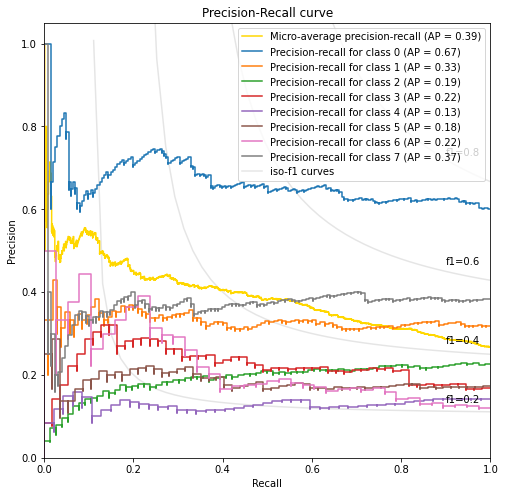

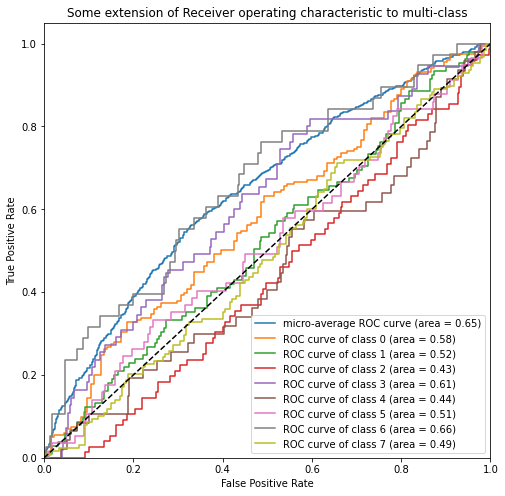

RandomForestClassifier(random_state=1):
Accuracy: 0.10746268656716418
Hamming Loss: 0.2544776119402985
Brier Score: 1.4317934328358208
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.88      0.72       201
           1       0.12      0.02      0.03       105
           2       0.14      0.01      0.02        76
           3       0.25      0.02      0.03        55
           4       0.40      0.04      0.08        47
           5       0.50      0.04      0.07        57
           6       0.00      0.00      0.00        38
           7       0.35      0.13      0.19       128

   micro avg       0.53      0.29      0.37       707
   macro avg       0.30      0.14      0.14       707
weighted avg       0.36      0.29      0.26       707
 samples avg       0.59      0.41      0.35       707

Confusion matrix:
 [[[ 19 115]
  [ 24 177]]

 [[216  14]
  [103   2]]

 [[253   6]
  [ 75   1]]

 [[277   3]
  [ 54   1]]

 [[285   3]
 

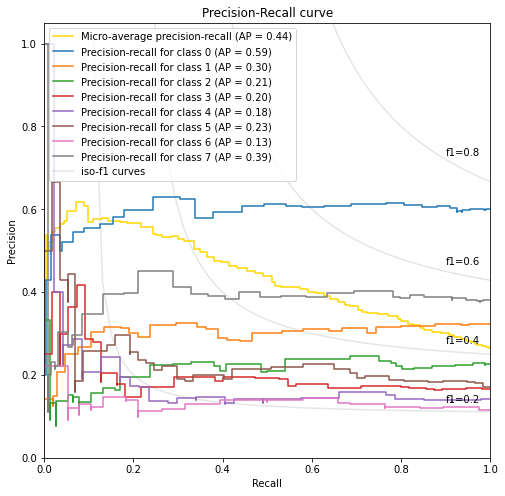

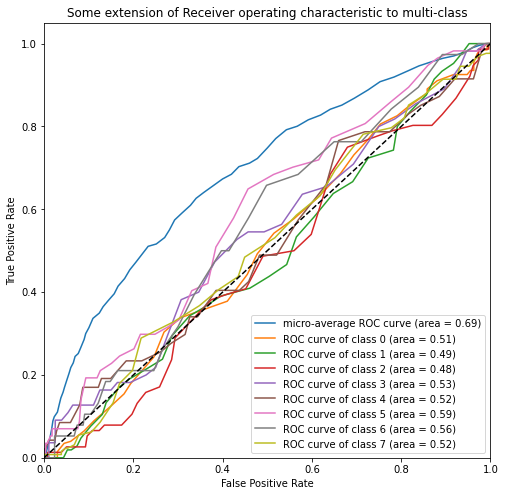

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
forest = RandomForestClassifier(random_state=1)
lg = LogisticRegression()
models = [lg, forest]

for model in models:

    multi_output_model = MultiOutputClassifier(model, n_jobs=-1)
    multi_output_model.fit(train_features, train_labels)
    predicted_labels = np.asarray(multi_output_model.predict_proba(test_features))[:, :, 1].T
    print(str(model)+':')
    evaluate(test_labels, predicted_labels)
    plot_pr_curve(test_labels, predicted_labels)
    plot_roc_curve(test_labels, predicted_labels)

### MLP simple

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5445
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5173
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5006
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4875
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4764
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4716
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4539
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4501
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4373
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4267
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4249
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4103
Epoch 13/100
32/32 [=================

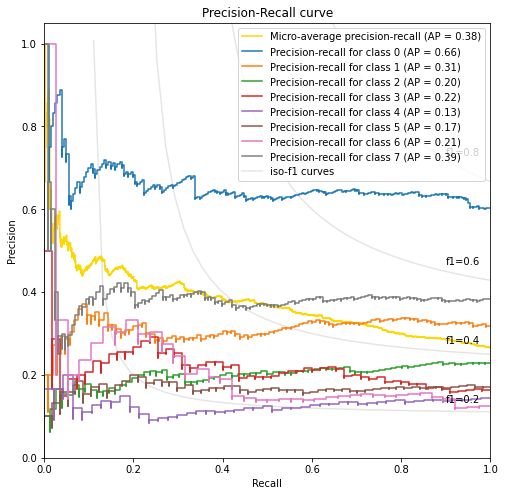

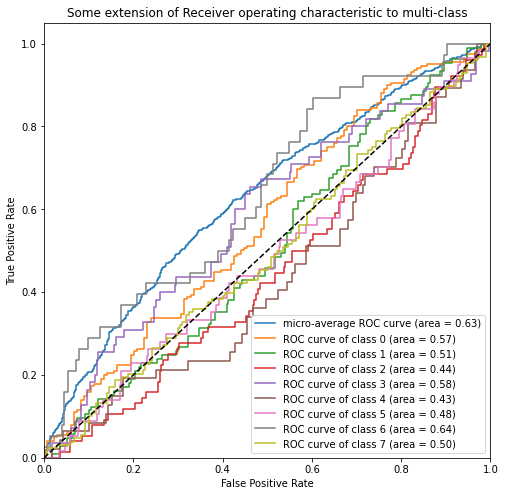

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_mlp(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(64, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

n_inputs, n_outputs = train_features.shape[1],train_labels.shape[1]
mlp = get_mlp(n_inputs, n_outputs)
mlp.fit(train_features, train_labels, verbose=1, epochs=100)

predicted_labels_mlp = mlp.predict(test_features)
evaluate(test_labels, predicted_labels_mlp)

plot_pr_curve(test_labels, predicted_labels_mlp)
plot_roc_curve(test_labels, predicted_labels_mlp)

## MLP more complicated

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5976
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5247
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5187
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5100
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5059
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5003
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4959
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4914
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4744
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4667
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4637
Epoch 13/100
32/32 [=================

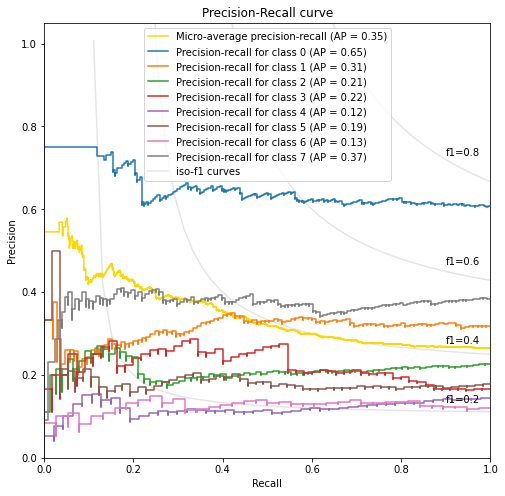

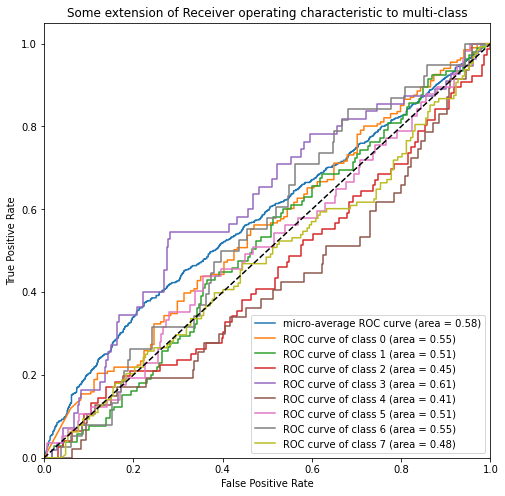

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_mlp(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(32, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(16, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(16, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(32, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))

    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

n_inputs, n_outputs = train_features.shape[1],train_labels.shape[1]
mlp = get_mlp(n_inputs, n_outputs)
mlp.fit(train_features, train_labels, verbose=1, epochs=100)

predicted_labels_mlp = mlp.predict(test_features)
evaluate(test_labels, predicted_labels_mlp)

plot_pr_curve(test_labels, predicted_labels_mlp)
plot_roc_curve(test_labels, predicted_labels_mlp)

### Binary Relevance
ignores the possible correlations between class labels

Accuracy: 0.008955223880597015
Hamming Loss: 0.4455223880597015
Brier Score: 3.530631331164949
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.49      0.56       201
           1       0.36      0.55      0.43       105
           2       0.21      0.46      0.28        76
           3       0.19      0.31      0.24        55
           4       0.16      0.38      0.22        47
           5       0.18      0.49      0.26        57
           6       0.11      0.45      0.18        38
           7       0.39      0.51      0.44       128

   micro avg       0.29      0.48      0.36       707
   macro avg       0.28      0.46      0.33       707
weighted avg       0.38      0.48      0.40       707
 samples avg       0.30      0.55      0.31       707

Confusion matrix:
 [[[ 80  54]
  [102  99]]

 [[126 104]
  [ 47  58]]

 [[124 135]
  [ 41  35]]

 [[209  71]
  [ 38  17]]

 [[192  96]
  [ 29  18]]

 [[150 128]
  [ 29  28]]

 

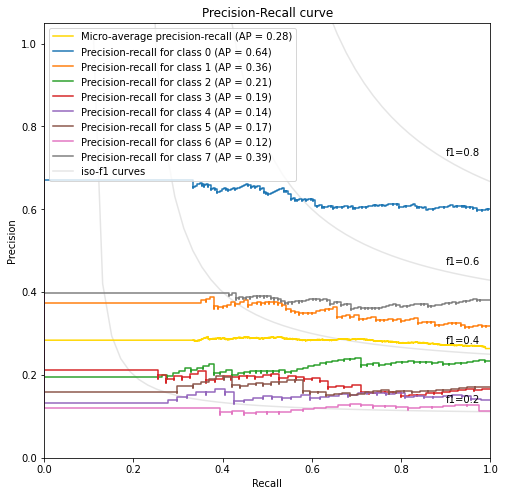

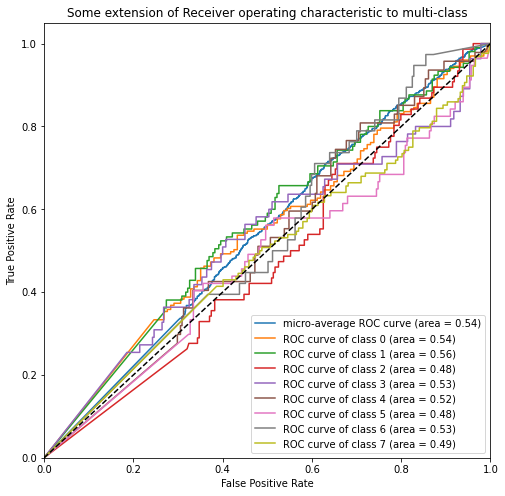

In [73]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

classifier = BinaryRelevance(GaussianNB())
classifier.fit(train_features, train_labels)


predicted_labels_br = classifier.predict_proba(test_features)
evaluate(test_labels, predicted_labels_br.toarray())

plot_pr_curve(test_labels, predicted_labels_br.toarray())
plot_roc_curve(test_labels, predicted_labels_br.toarray())

### Classfier Chains

/home/ubuntu/anaconda3/envs/ai4halth/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/envs/ai4halth/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Accuracy: 0.07761194029850746
Hamming Loss: 0.29850746268656714
Brier Score: 1.7956481677051266
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.67      0.65       201
           1       0.34      0.24      0.28       105
           2       0.07      0.04      0.05        76
           3       0.25      0.11      0.15        55
           4       0.15      0.09      0.11        47
           5       0.07      0.04      0.05        57
           6       0.38      0.16      0.22        38
           7       0.35      0.30      0.32       128

   micro avg       0.41      0.31      0.35       707
   macro avg       0.28      0.20      0.23       707
weighted avg       0.36      0.31      0.32       707
 samples avg       0.55      0.41      0.31       707

Confusion matrix:
 [[[ 57  77]
  [ 67 134]]

 [[182  48]
  [ 80  25]]

 [[221  38]
  [ 73   3]]

 [[262  18]
  [ 49   6]]

 [[265  23]
  [ 43   4]]

 [[253  25]
  [ 55   2]]



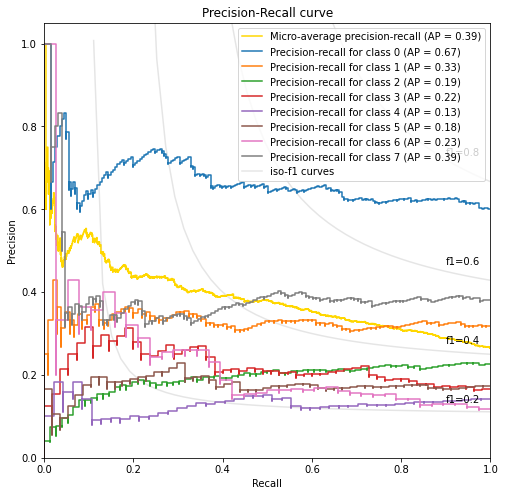

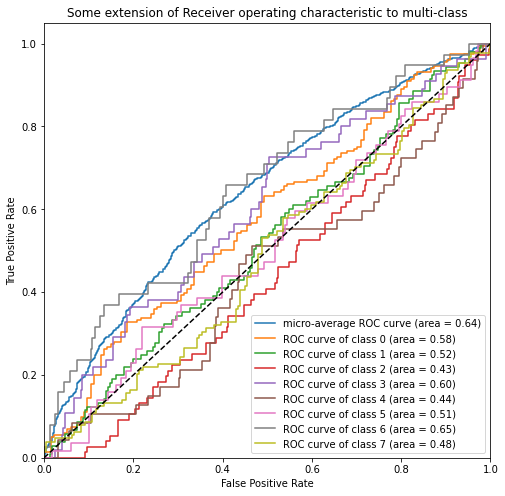

In [74]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

classifier = ClassifierChain(LogisticRegression())
classifier.fit(train_features, train_labels)
# we should optimise this a little

predicted_labels_cc = classifier.predict_proba(test_features)
evaluate(test_labels, predicted_labels_cc.toarray())

plot_pr_curve(test_labels, predicted_labels_cc.toarray())
plot_roc_curve(test_labels, predicted_labels_cc.toarray())

### Label Powerset
takes correlations into account!

/home/ubuntu/anaconda3/envs/ai4halth/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.07761194029850746
Hamming Loss: 0.2656716417910448
Brier Score: 1.5146523333340072
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.74      0.66       201
           1       0.41      0.14      0.21       105
           2       0.15      0.03      0.04        76
           3       1.00      0.00      0.00        55
           4       0.12      0.02      0.04        47
           5       0.20      0.02      0.03        57
           6       1.00      0.00      0.00        38
           7       0.28      0.15      0.19       128

   micro avg       0.49      0.26      0.34       707
   macro avg       0.47      0.14      0.15       707
weighted avg       0.45      0.26      0.27       707
 samples avg       0.60      0.38      0.31       707

Confusion matrix:
 [[[ 35  99]
  [ 52 149]]

 [[208  22]
  [ 90  15]]

 [[248  11]
  [ 74   2]]

 [[280   0]
  [ 55   0]]

 [[281   7]
  [ 46   1]]

 [[274   4]
  [ 56   1]]

 

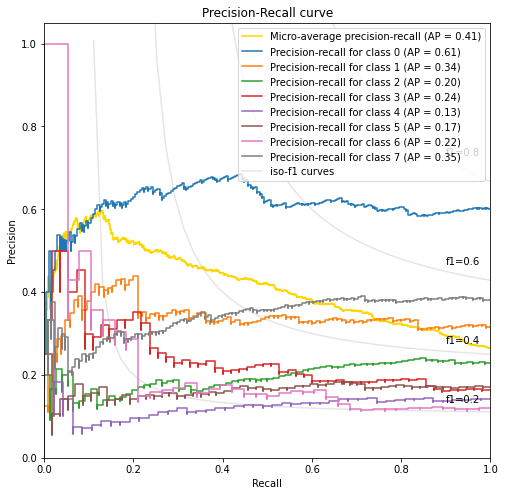

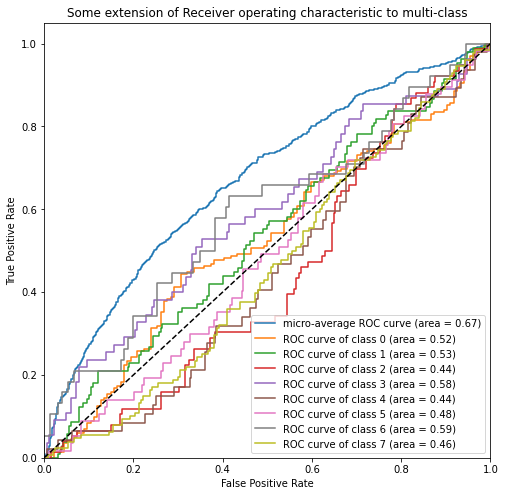

In [75]:
from skmultilearn.problem_transform import LabelPowerset

classifier = LabelPowerset(LogisticRegression())
classifier.fit(train_features, train_labels)

predicted_labels_lp = classifier.predict_proba(test_features)
evaluate(test_labels, predicted_labels_lp.toarray())

plot_pr_curve(test_labels, predicted_labels_lp.toarray())
plot_roc_curve(test_labels, predicted_labels_lp.toarray())

Accuracy: 0.12835820895522387
Hamming Loss: 0.24067164179104478
Brier Score: 1.3761367164179106
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.97      0.74       201
           1       0.00      0.00      0.00       105
           2       1.00      0.00      0.00        76
           3       1.00      0.00      0.00        55
           4       1.00      0.00      0.00        47
           5       1.00      0.00      0.00        57
           6       1.00      0.00      0.00        38
           7       0.41      0.07      0.12       128

   micro avg       0.59      0.29      0.39       707
   macro avg       0.75      0.13      0.11       707
weighted avg       0.63      0.29      0.23       707
 samples avg       0.62      0.41      0.37       707

Confusion matrix:
 [[[  7 127]
  [  7 194]]

 [[229   1]
  [105   0]]

 [[259   0]
  [ 76   0]]

 [[280   0]
  [ 55   0]]

 [[288   0]
  [ 47   0]]

 [[278   0]
  [ 57   0]]



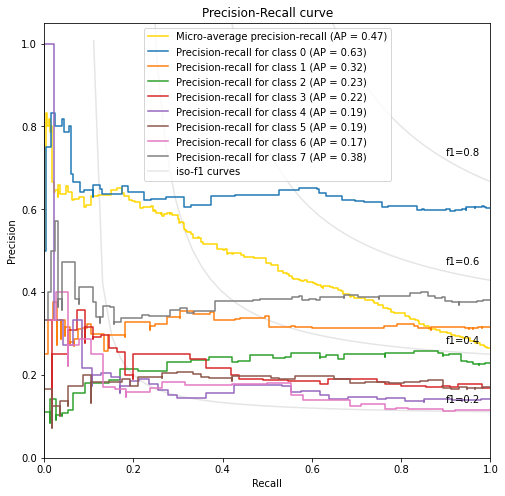

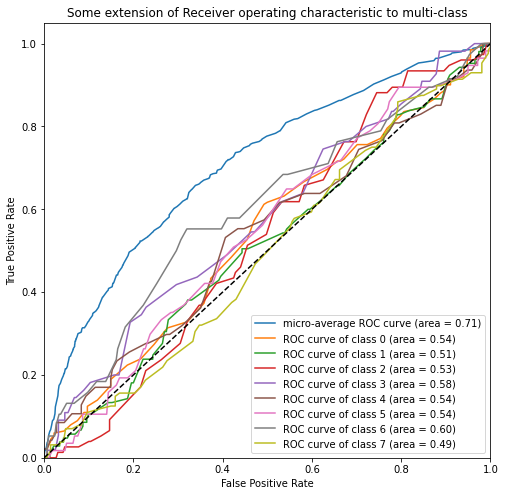

In [76]:
from skmultilearn.problem_transform import LabelPowerset

classifier = LabelPowerset(RandomForestClassifier())
classifier.fit(train_features, train_labels)

predicted_labels_lp = classifier.predict_proba(test_features)
evaluate(test_labels, predicted_labels_lp.toarray())

plot_pr_curve(test_labels, predicted_labels_lp.toarray())
plot_roc_curve(test_labels, predicted_labels_lp.toarray())